In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [14]:
def parse_fastq(fastq_file):
    sequences = []
    qualities = []
    with open(fastq_file, 'r') as f:
        while True:
            header = f.readline().strip()
            if not header:
                break
            seq = f.readline().strip() # Reads genome sequence line
            f.readline().strip()
            qual = f.readline().strip() # Reads quality sequence line
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities

f1Sequences, f1Qualities = parse_fastq('ERR266411_1.first1000.fastq')
print(f1Sequences)
f2Sequences, f2Qualities = parse_fastq('SRR835775_1.first1000.fastq')

['TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATACGAAAGTGTTAACTTCTGCGTCATGGACACGAAAAAACTCCC', 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG', 'AGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATC', 'TAAACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTC', 'AACAAGCAGTAGTAATTCCTGCTTTATCAAGATAATTTTTCGACTCATCAGAAATATCCGAAAGTGTTAACTTCTGCGTCATGGAAGCGATAAAACTCTG', 'GACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTTTATCGCTTCCATGACGCAGAAGTTAACACTTTCG', 'CTGTAGCCGACGTTTTGGCGGCGCAACCTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAACCTGCAGAGTTT', 'CTGTGACGACAAATCTGCTCAAATTTATGCGCGCTTCGATAAAAATGATTGGCGTATCCAAC

In [5]:
def convert_quality(qualities):
    return [[ord(char) - 33 for char in qual] for qual in qualities]

def quality_score_distribution(qualities):
    quality_scores = convert_quality(qualities)
    distribution = np.zeros(128)  # Max ASCII value of 127
    for qual in quality_scores:
        for score in qual:
            distribution[score] += 1
    return distribution

f1QualDistribution = quality_score_distribution(f1Qualities)
f2QualDistribution = quality_score_distribution(f2Qualities)

In [6]:
def gc_content_distribution(sequences):
    gc_content = np.zeros(len(sequences[0]))  
    for seq in sequences:
        for i, base in enumerate(seq):
            if base in 'GCgc':
                gc_content[i] += 1
    gc_content_percentage = (gc_content / len(sequences)) * 100
    return gc_content_percentage

f1SeqDistribution = gc_content_distribution(f1Sequences)
f2SeqDistribution = gc_content_distribution(f2Sequences)

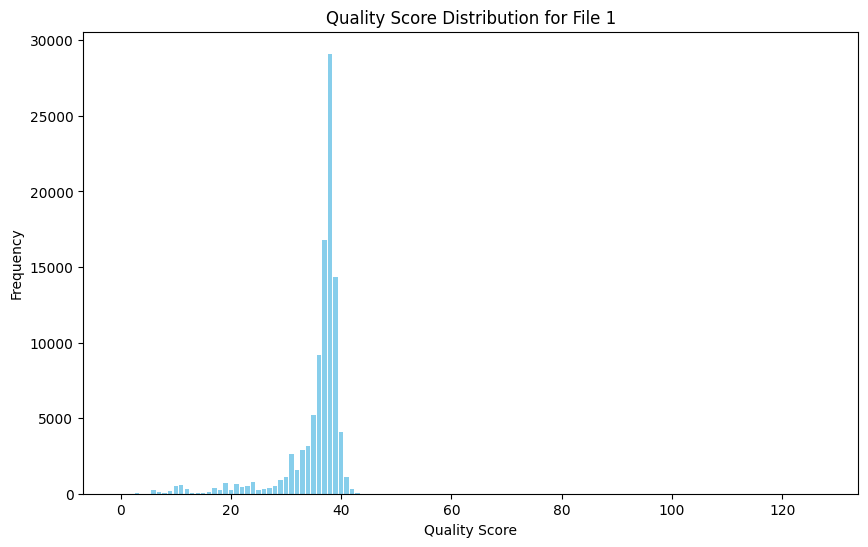

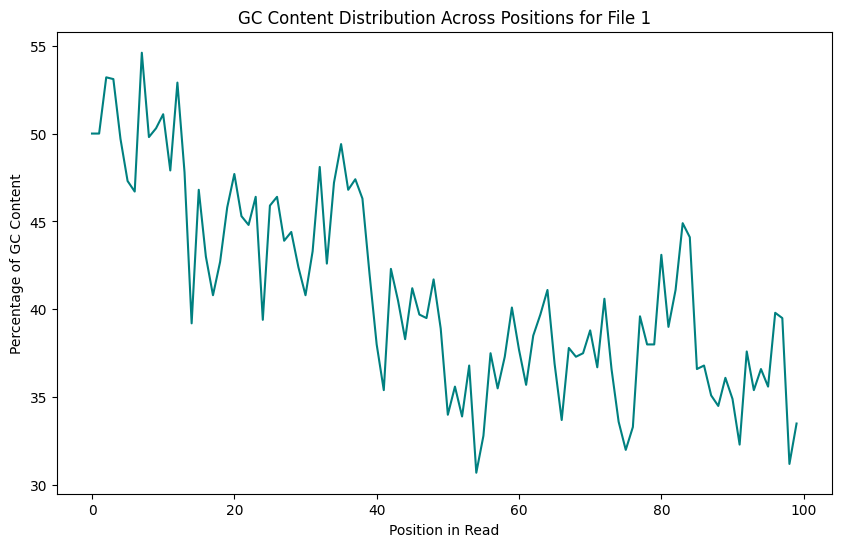

In [16]:
## Distribution Plots for file 1 (ERR266411_1.first1000.fastq)

# Quality Score Distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(f1QualDistribution)), f1QualDistribution, color='skyblue')
plt.title('Quality Score Distribution for File 1')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

# GC Content Distribution
plt.figure(figsize=(10, 6))
plt.plot(f1SeqDistribution, color='teal')
plt.title('GC Content Distribution Across Positions for File 1')
plt.xlabel('Position in Read')
plt.ylabel('Percentage of GC Content')
plt.show()

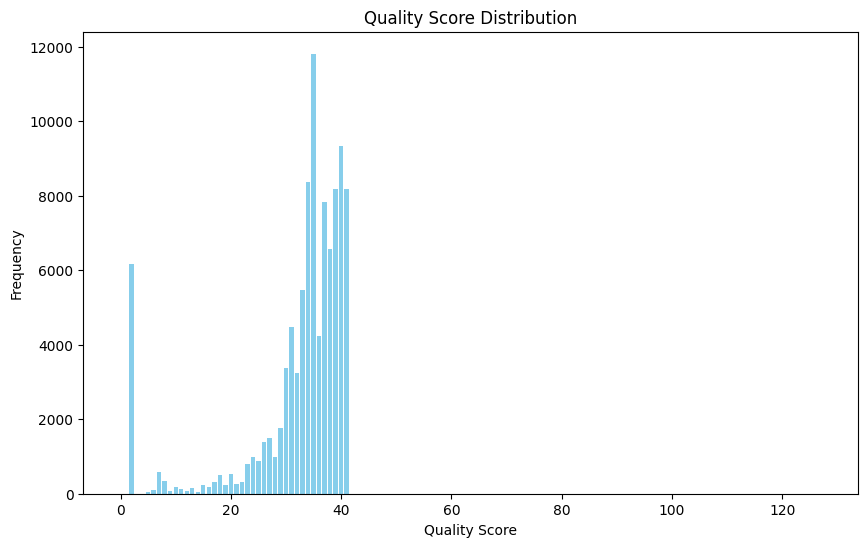

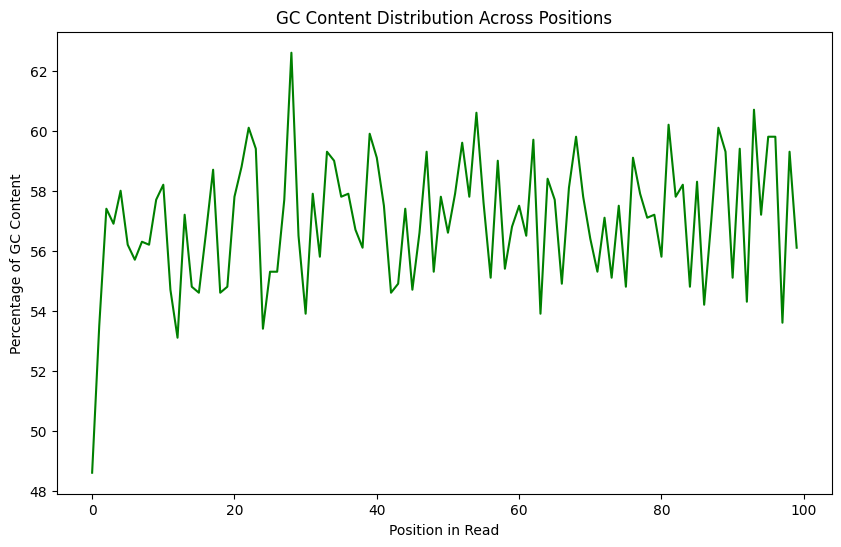

In [13]:
## Distribution Plots for file 2 (SRR835775_1.first1000.fastq)

# Quality Score Distribution
plt.figure(figsize=(10, 6))
plt.bar(range(len(f2QualDistribution)), f2QualDistribution, color='skyblue')
plt.title('Quality Score Distribution for File 2')
plt.xlabel('Quality Score')
plt.ylabel('Frequency')
plt.show()

# GC Content Distribution
plt.figure(figsize=(10, 6))
plt.plot(f2SeqDistribution, color='green')
plt.title('GC Content Distribution Across Positions for File 2')
plt.xlabel('Position in Read')
plt.ylabel('Percentage of GC Content')
plt.show()